In [1]:
from keras.models import Sequential,Model
from keras.layers import Activation
from keras.layers.core import Dense,Flatten,Dropout
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam, RMSprop , SGD
import keras 
import keras.backend as B
import numpy as np
import keras.applications as A
import matplotlib.pyplot as plt
%matplotlib inline

import os
from keras import regularizers

Using TensorFlow backend.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from keras.applications import vgg19
from keras.applications.vgg19 import preprocess_input, decode_predictions
from keras.callbacks import ModelCheckpoint

In [3]:
base_dir =r'D:\datasets'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir, 'test')

In [4]:
vgg = vgg19.VGG19(weights='imagenet',include_top=False, input_shape=(224,224,3))

In [5]:
model = Sequential()
for layer in vgg.layers[:-8]:
  layer.trainable=False

In [6]:
for layer in vgg.layers:
  print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x00000231B05F5908> False
<keras.layers.convolutional.Conv2D object at 0x00000231B05F5AC8> False
<keras.layers.convolutional.Conv2D object at 0x00000231B03E19C8> False
<keras.layers.pooling.MaxPooling2D object at 0x00000231B07844C8> False
<keras.layers.convolutional.Conv2D object at 0x00000231B0784888> False
<keras.layers.convolutional.Conv2D object at 0x00000231B0792788> False
<keras.layers.pooling.MaxPooling2D object at 0x00000231B0792408> False
<keras.layers.convolutional.Conv2D object at 0x00000231B0797388> False
<keras.layers.convolutional.Conv2D object at 0x00000231B079FD88> False
<keras.layers.convolutional.Conv2D object at 0x00000231B07A4988> False
<keras.layers.convolutional.Conv2D object at 0x00000231B07ADDC8> False
<keras.layers.pooling.MaxPooling2D object at 0x00000231B69769C8> False
<keras.layers.convolutional.Conv2D object at 0x00000231B6976188> False
<keras.layers.convolutional.Conv2D object at 0x00000231B697E808> False
<ker

In [7]:
# Add the vgg convolutional base model
model.add(vgg)
 
# Add new layers
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu' ))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu' ))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu' ))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 25088)             100352    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_2 (Dense)              (None, 512)              

In [8]:
from plot_model import plot_model
plot_model(model)

AttributeError: 'Model' object has no attribute 'outbound_nodes'

In [8]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


validation_datagen = ImageDataGenerator(rescale=1./255 )
 
# Change the batchsize according to your system RAM
train_batchsize = 32
val_batchsize = 32

In [9]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical'
        )
 
validation_generator = train_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 29978 images belonging to 5 classes.
Found 9788 images belonging to 5 classes.


In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=1e-5),
              metrics=['acc'])

In [11]:
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100 ,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

Epoch 1/30
100/100 [==============================] - 63s 634ms/step - loss: 1.8180 - acc: 0.3191 - val_loss: 1.0114 - val_acc: 0.8600
Epoch 2/30
100/100 [==============================] - 57s 573ms/step - loss: 1.2271 - acc: 0.5259 - val_loss: 1.0258 - val_acc: 0.9162
Epoch 3/30
100/100 [==============================] - 60s 600ms/step - loss: 0.8713 - acc: 0.6785 - val_loss: 0.4796 - val_acc: 0.9475
Epoch 4/30
100/100 [==============================] - 59s 585ms/step - loss: 0.6249 - acc: 0.7756 - val_loss: 1.1078 - val_acc: 0.9394
Epoch 5/30
100/100 [==============================] - 61s 614ms/step - loss: 0.4214 - acc: 0.8616 - val_loss: 0.1105 - val_acc: 0.9675
Epoch 6/30
100/100 [==============================] - 64s 645ms/step - loss: 0.3195 - acc: 0.8997 - val_loss: 0.1393 - val_acc: 0.9737
Epoch 7/30
100/100 [==============================] - 62s 623ms/step - loss: 0.2522 - acc: 0.9266 - val_loss: 0.0379 - val_acc: 0.9060
Epoch 8/30
100/100 [==============================] - 6

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                target_size=(224, 224),
                                batch_size=1,
                                class_mode='categorical')
model.evaluate(test_generator)

Found 133 images belonging to 5 classes.
133/133 [==============================] - 2s 17ms/step


[5.364403477869928e-06, 0.8646616339683533]

In [3]:
y_true = test_generator.classes
predictions = model.predict_generator(test_generator)
y_pred = np.array([np.argmax(x) for x in predictions])
y_pred

NameError: name 'test_generator' is not defined

In [1]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_true, y_pred)

NameError: name 'y_true' is not defined

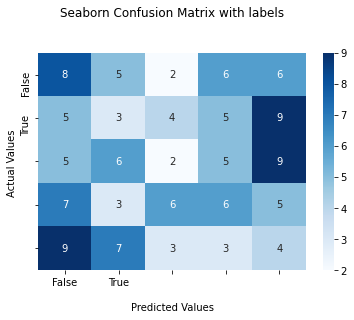

In [20]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [21]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.30      0.26        27
           1       0.12      0.12      0.12        26
           2       0.12      0.07      0.09        27
           3       0.24      0.22      0.23        27
           4       0.12      0.15      0.14        26

    accuracy                           0.17       133
   macro avg       0.17      0.17      0.17       133
weighted avg       0.17      0.17      0.17       133



In [26]:
model_json = model.to_json()
with open("kaggle_2_vgg19", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("kaggle_2_vgg19.h5")
print("Saved model to disk")

Saved model to disk


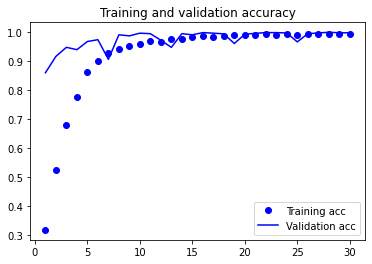

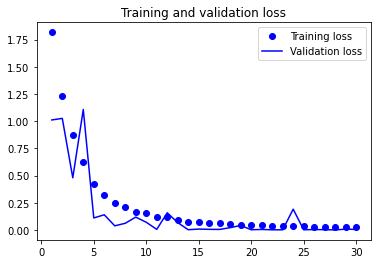

In [24]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc =history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# auc = history.history['auc_1']
# val_auc = history.history['val_auc_1']



epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

# plt.figure()
# plt.plot(epochs, auc, 'bo', label= 'AUC')
# plt.plot(epochs, val_auc, 'b', label = 'AUC loss')
# plt.title('Training and validation loss')
# plt.legend()

plt.show()

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 25088)             100352    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_2 (Dense)              (None, 512)              

In [35]:
!pip install plot_model

In [ ]:
from plot_model import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, style=0, color=True, dpi=96)

InvocationException: GraphViz's executables not found

In [9]:
!conda install python-graphviz

